<h1>Visualize ExeBuiltByOMEdit: AircraftDynamics.PtMassFDM.DoF3.Examples.TwoBodyOrbital00</h1>
<h2>notebook: rev001</h2>
<p>compatability with OpenModelica v1.21.0</p>
<h2>memo: </h2>
<p></p>

<h1>Load modules </h1>

In [10]:
#****************************************
#    User must NOT edit code below 
#****************************************
import OMPython
from OMPython import OMCSessionZMQ
from OMPython import ModelicaSystem

import os
from os.path import expanduser

import numpy
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import pathlib
import math

from IPython.display import display, HTML

backslash= '\\'
print('------------------------------')

------------------------------


In [11]:
#****************************************
#    User must NOT edit code below 
#****************************************
# ----- prepare for post process -----
n_df=100000
df=[[]]*n_df
i_df= -10
print('----------')

----------


<h1>===========================================================================</h1>

<h1>Run simulation model #1</h1>

<h1>User settings: Library and Model information</h1>
<p>Edit the strings below </p>

In [12]:
dirWorkRelToHome='/OMPythonWork'
swWorkSubDir= 'fullpathModel'
'''
'None': 
'fullPathModel': work in sub dir named with fullaPathModel
'''

#dirModelRelToLibDir='/Examples/ThermodynamicCycles'
libs2load=["PropulsionSystem", "FluidSystemComponents", "WalkingInWorldOfThermoFluid", "AircraftDynamics", "SystemModels", "InteractiveSimulation"]
fullpathModel='AircraftDynamics.PtMassFDM.DoF3.Examples.ThreeBodyOrbital00'
nmModel='ThreeBodyOrbital00'
outputFormat='csv'

#****************************************
#    User must NOT edit code below 
#****************************************
dirWorkRelToHome= dirWorkRelToHome.replace(backslash, '/')
if(swWorkSubDir=='fullpathModel'):
    dirWorkRelToHome= dirWorkRelToHome + '/' + fullpathModel
##### end if #####

print('------------------------------')

------------------------------


<h1>Setup </h1>

In [13]:
#**************************************************
# ----- setup -----
#**************************************************
#****************************************
#    User must NOT edit code below 
#****************************************
#*** get directory of this notebook
sys.path.append('..')
pathNotebook= os.getcwd()
pathNotebook= pathNotebook.replace(backslash, '/')
print('------------------------------'); print('')

#*** distinguish OS
if(os.name=='nt'):
    dirHome=expanduser("~")
    typeOS='Windows (nt)'
elif(os.name=='posix'):
    dirHome=os.environ['HOME']
    typeOS= 'Linux or Mac (posix)'
##### end if #####

#*** direcotory of temporary work
dirHome= dirHome.replace(backslash, '/')
dirWorkRelToHome= dirWorkRelToHome.replace(backslash, '/')
dirWork= dirHome + dirWorkRelToHome

#*** get library directory
dirLib=''
sys.path.append('..')
dirLib= pathlib.Path('../../')
dirLib_upper1= pathlib.Path('../../')

dirLib= dirLib.resolve()
dirLib= str(dirLib)
dirLib= dirLib.replace('\\', '/')

dirLib_upper1= dirLib_upper1.resolve()

fullpathModelFile= str(dirLib_upper1)+'\\'+fullpathModel.replace('.','\\') +'.mo'
fullpathModelFile= fullpathModelFile.replace('\\', '/')


print("########## check user settings and related info. ##########")
print('-. This OS is: ' + typeOS)
print('-. Home directory of current environment is: ' + dirHome)
print("-. Temporary Working directory is: "+str(dirWork))
print('')
print('-. Directory of This notebook: '+ pathNotebook)
print('-. Directory of library which contains this notebook is: ' + str(dirLib))
print("-. Full path of Model to be ran is: " + fullpathModel)
print("-. Full path of Model file to be ran is: " + fullpathModelFile)

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')

------------------------------

########## check user settings and related info. ##########
-. This OS is: Linux or Mac (posix)
-. Home directory of current environment is: /home/ubuntu
-. Temporary Working directory is: /home/ubuntu/OMPythonWork/AircraftDynamics.PtMassFDM.DoF3.Examples.ThreeBodyOrbital00

-. Directory of This notebook: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/AircraftDynamics
-. Directory of library which contains this notebook is: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib
-. Full path of Model to be ran is: AircraftDynamics.PtMassFDM.DoF3.Examples.ThreeBodyOrbital00
-. Full path of Model file to be ran is: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/AircraftDynamics/PtMassFDM/DoF3/Examples/ThreeBodyOrbital00.mo

------------------------------
move to directory of notebook
currend dir, back to: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/AircraftDynamics
------

<h1>Setup </h1>

In [14]:
#**************************************************
# ----- setup -----
#**************************************************
#****************************************
#    User must NOT edit code below 
#****************************************
omc= OMCSessionZMQ()

#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

#-- move OMShell to working directory
strcmd= 'cd("' + dirWork + '")'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))

#--------------------
#    set build option for old frontend
#    this option setting is neccesarry so that model written with older than Modelica 4.0.0 is ran by OpenModelica newer than 1.17.0
#--------------------
print(''); print('...front end setting, wait...')
strcmd='disableNewInstantiation()'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))

# --- get error message from OMShell ---
print('')
errMsg= omc.sendExpression('getErrorString()')
print('OMShell error message: ')
print(str(errMsg))
print('')

#----------------------------------------
#    settings of command line options
#----------------------------------------
print(''); print('...front end setting, wait...')
strcmd='setCommandLineOptions("--matchingAlgorithm=PFPlusExt --indexReductionMethod=dummyDerivatives -d=initialization, evaluateAllParameters,NLSanalyticJacobian")'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))

# --- get error message from OMShell ---
print('')
errMsg= omc.sendExpression('getErrorString()')
print('OMShell error message: ')
print(str(errMsg))
print('')

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')

currend dir: /home/ubuntu/OMPythonWork/AircraftDynamics.PtMassFDM.DoF3.Examples.ThreeBodyOrbital00
------------------------------

send: cd("/home/ubuntu/OMPythonWork/AircraftDynamics.PtMassFDM.DoF3.Examples.ThreeBodyOrbital00")
OMShell: /home/ubuntu/OMPythonWork/AircraftDynamics.PtMassFDM.DoF3.Examples.ThreeBodyOrbital00

...front end setting, wait...
send: disableNewInstantiation()
OMShell: True

OMShell error message: 



...front end setting, wait...
send: setCommandLineOptions("--matchingAlgorithm=PFPlusExt --indexReductionMethod=dummyDerivatives -d=initialization, evaluateAllParameters,NLSanalyticJacobian")
OMShell: False

OMShell error message: 



------------------------------
move to directory of notebook
currend dir, back to: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/AircraftDynamics
------------------------------


<h1>---------------------------------------------------------------------------------------------------------</h1>

<h1>Post Process --- Read csv data into table object ---</h1>

<h2>Read csv, case of default parameter setting</h2>

In [15]:
i_df=0

#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

#nmcsv= fullpathModel + '_res.csv'
nmcsv= nmModel + '_res.csv'
fullpathFile= os.getcwd()+"/"+nmcsv
fullpathFile= fullpathFile.replace(backslash, "/")
print("data read: "+ fullpathFile)
df.insert(i_df, pd.read_csv(nmcsv))

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())

df[i_df]

currend dir: /home/ubuntu/OMPythonWork/AircraftDynamics.PtMassFDM.DoF3.Examples.ThreeBodyOrbital00
------------------------------

data read: /home/ubuntu/OMPythonWork/AircraftDynamics.PtMassFDM.DoF3.Examples.ThreeBodyOrbital00/ThreeBodyOrbital00_res.csv

------------------------------
move to directory of notebook
currend dir, back to: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/AircraftDynamics


,time,r1[1],r1[2],r1[3],r2[1],r2[2],r2[3],r3[1],r3[2],r3[3],...,v2_3[2],v2_3[3],v2_3Abs,v3Abs,a2[1],a2[2],a2[3],a3[1],a3[2],a3[3]
0,0,0,0,0,3.328993e+08,-1.921995e+08,0,-6.778137e+06,0.000000e+00,0,...,-10885.077963,0,10897.065809,10000.000000,-0.002336,0.001349,0,8.675678,0.000016,0
1,30,0,0,0,3.329146e+08,-1.921729e+08,0,-6.774234e+06,-2.999424e+05,0,...,-10879.362330,0,10882.253103,9997.628285,-0.002336,0.001349,0,8.660198,0.383464,0
2,60,0,0,0,3.329300e+08,-1.921464e+08,0,-6.762540e+06,-5.995401e+05,0,...,-10862.185347,0,10862.188629,9990.532248,-0.002336,0.001348,0,8.613986,0.763700,0
3,90,0,0,0,3.329453e+08,-1.921198e+08,0,-6.743096e+06,-8.984510e+05,0,...,-10833.689497,0,10836.951253,9978.759930,-0.002336,0.001348,0,8.537720,1.137587,0
4,120,0,0,0,3.329606e+08,-1.920933e+08,0,-6.715969e+06,-1.196339e+06,0,...,-10794.108611,0,10806.653668,9962.390257,-0.002337,0.001348,0,8.432505,1.502132,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5757,172710,0,0,0,3.838839e+08,-2.485144e+07,0,9.445119e+06,-1.552959e+07,0,...,-2079.639319,0,5362.840663,5123.451352,-0.002688,0.000174,0,-0.626960,1.030786,0
5758,172740,0,0,0,3.838860e+08,-2.482087e+07,0,9.595210e+06,-1.556095e+07,0,...,-2048.956638,0,5333.733240,5098.776374,-0.002688,0.000174,0,-0.625998,1.015151,0
5759,172770,0,0,0,3.838881e+08,-2.479030e+07,0,9.744739e+06,-1.559139e+07,0,...,-2018.737901,0,5304.914091,5074.357659,-0.002688,0.000174,0,-0.624951,0.999854,0
5760,172800,0,0,0,3.838901e+08,-2.475974e+07,0,9.893704e+06,-1.562094e+07,0,...,-1988.973064,0,5276.378236,5050.190846,-0.002688,0.000173,0,-0.623824,0.984886,0


<h1> list of columns on csv </h1>

In [16]:
i_df=0

print('list of variables on csv')
df[i_df].columns.tolist()


list of variables on csv


['time',
 'r1[1]',
 'r1[2]',
 'r1[3]',
 'r2[1]',
 'r2[2]',
 'r2[3]',
 'r3[1]',
 'r3[2]',
 'r3[3]',
 'v1[1]',
 'v1[2]',
 'v1[3]',
 'v2[1]',
 'v2[2]',
 'v2[3]',
 'v3[1]',
 'v3[2]',
 'v3[3]',
 'der(r1[1])',
 'der(r1[2])',
 'der(r1[3])',
 'der(r2[1])',
 'der(r2[2])',
 'der(r2[3])',
 'der(r3[1])',
 'der(r3[2])',
 'der(r3[3])',
 'der(v1[1])',
 'der(v1[2])',
 'der(v1[3])',
 'der(v2[1])',
 'der(v2[2])',
 'der(v2[3])',
 'der(v3[1])',
 'der(v3[2])',
 'der(v3[3])',
 'Alt',
 'Fg1_2[1]',
 'Fg1_2[2]',
 'Fg1_2[3]',
 'Fg1_3[1]',
 'Fg1_3[2]',
 'Fg1_3[3]',
 'Fg2_1[1]',
 'Fg2_1[2]',
 'Fg2_1[3]',
 'Fg2_3[1]',
 'Fg2_3[2]',
 'Fg2_3[3]',
 'Fg3_1[1]',
 'Fg3_1[2]',
 'Fg3_1[3]',
 'Fg3_2[1]',
 'Fg3_2[2]',
 'Fg3_2[3]',
 'a1[1]',
 'a1[2]',
 'a1[3]',
 'a1Abs',
 'a1_2[1]',
 'a1_2[2]',
 'a1_2[3]',
 'a1_2Abs',
 'a1_3[1]',
 'a1_3[2]',
 'a1_3[3]',
 'a1_3Abs',
 'a2Abs',
 'a2_3[1]',
 'a2_3[2]',
 'a2_3[3]',
 'a2_3Abs',
 'a3Abs',
 'mag_r1',
 'mag_r1_2',
 'mag_r1_3',
 'mag_r2',
 'mag_r2_3',
 'mag_r3',
 'r1_2[1]',
 'r1_2[2]',

<h1>Read csv, selected case#</h1>

In [17]:
i_df=0

#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

nmcsv= nmModel + '_res_' + str(i_df) + '.csv'
fullpathFile= os.getcwd()+"/"+nmcsv
fullpathFile= fullpathFile.replace(backslash, "/")
print("data read: "+ fullpathFile)
df.insert(i_df, pd.read_csv(nmcsv))

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())

df[i_df]

currend dir: /home/ubuntu/OMPythonWork/AircraftDynamics.PtMassFDM.DoF3.Examples.ThreeBodyOrbital00
------------------------------

data read: /home/ubuntu/OMPythonWork/AircraftDynamics.PtMassFDM.DoF3.Examples.ThreeBodyOrbital00/ThreeBodyOrbital00_res_0.csv

------------------------------
move to directory of notebook
currend dir, back to: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/AircraftDynamics


,time,r1[1],r1[2],r1[3],r2[1],r2[2],r2[3],r3[1],r3[2],r3[3],...,v2_3[2],v2_3[3],v2_3Abs,v3Abs,a2[1],a2[2],a2[3],a3[1],a3[2],a3[3]
0,0,0,0,0,2.811316e+08,-2.621595e+08,0,-6.778137e+06,0.000000e+00,0,...,-11527.443483,0,11548.496244,10780.000000,-0.001973,0.001840,0,8.675682,0.000022,0
1,50,0,0,0,2.811665e+08,-2.621221e+08,0,-6.767290e+06,-5.387118e+05,0,...,-11510.310246,0,11513.337952,10771.476483,-0.001973,0.001839,0,8.621436,0.686335,0
2,100,0,0,0,2.812013e+08,-2.620847e+08,0,-6.734926e+06,-1.075713e+06,0,...,-11459.328465,0,11460.495884,10746.199062,-0.001973,0.001839,0,8.461517,1.351512,0
3,150,0,0,0,2.812362e+08,-2.620474e+08,0,-6.681427e+06,-1.609343e+06,0,...,-11376.021165,0,11390.832985,10704.792346,-0.001974,0.001839,0,8.204394,1.976205,0
4,200,0,0,0,2.812710e+08,-2.620100e+08,0,-6.607435e+06,-2.138045e+06,0,...,-11262.833369,0,11305.632719,10648.292482,-0.001974,0.001839,0,7.863011,2.544356,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15997,799850,0,0,0,8.217088e+07,3.798715e+08,0,1.109777e+08,-4.270982e+07,0,...,237.693208,0,1157.750572,2168.530868,-0.000558,-0.002579,0,-0.026306,0.010097,0
15998,799900,0,0,0,8.212155e+07,3.798825e+08,0,1.108717e+08,-4.268693e+07,0,...,238.327609,0,1159.142029,2169.924386,-0.000558,-0.002579,0,-0.026352,0.010119,0
15999,799950,0,0,0,8.207221e+07,3.798935e+08,0,1.107656e+08,-4.266401e+07,0,...,238.963115,0,1160.536096,2171.320412,-0.000557,-0.002579,0,-0.026398,0.010141,0
16000,800000,0,0,0,8.202288e+07,3.799045e+08,0,1.106595e+08,-4.264106e+07,0,...,239.599728,0,1161.932781,2172.718955,-0.000557,-0.002579,0,-0.026444,0.010163,0


<h2>Read Parameters CSV Table</h2>

In [18]:
#****************************************
#    User Setting section 
#****************************************
nameParameterTableCSV="PtMassFDM.DoF3.Examples.ThreeBodyOrbital00_ParTable_4.csv"
swDir="ipynbs"
'''
'ipynbs': csv is in the save directory as this ipynbs
'workDir': csv is in the same directory as working dir
'''
if(swDir=='workDir'):
    fullPathCSV= nameParameterTableCSV
elif(swDir=='ipynbs'):
    fullPathCSV= pathNotebook+'/'+nameParameterTableCSV
#***** end if *****


#****************************************
#    User must NOT edit code below 
#****************************************
#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')
#----------

print("Reading CSV...")
print(fullPathCSV)
df_parameter = pd.read_csv(fullPathCSV, index_col=0, header=0)

print(''); 
print("Parameter Table read:")
print(df_parameter)
print('------------------------------')

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')


currend dir: /home/ubuntu/OMPythonWork/AircraftDynamics.PtMassFDM.DoF3.Examples.ThreeBodyOrbital00
------------------------------

Reading CSV...
/home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/AircraftDynamics/PtMassFDM.DoF3.Examples.ThreeBodyOrbital00_ParTable_4.csv

Parameter Table read:
                     2543      2544      2545      2546      2547      2548  \
swExec               Exec      Exec      Exec      Exec      Exec      Exec   
r3_init[1]       -6778137  -6778137  -6778137  -6778137  -6778137  -6778137   
r3_init[2]              0         0         0         0         0         0   
r3_init[3]              0         0         0         0         0         0   
v3_init[1]              0         0         0         0         0         0   
v3_init[2]         -10749    -10749    -10749    -10749    -10749    -10749   
v3_init[3]              0         0         0         0         0         0   
phi_r2_deg_init       -35     -35.5       -36 

<h1>Read csv, multi-cases</h1>

In [19]:
iRunBegin= 1
iRunEnd= 2

#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

for i in range(iRunBegin, iRunEnd+1):
    i_df=i
    nmcsv= nmModel + '_res_' + str(i_df) + '.csv'
    fullpathFile= os.getcwd()+"/"+nmcsv
    fullpathFile= fullpathFile.replace(backslash, "/")
    print("data read: "+ fullpathFile)
    df.insert(i_df, pd.read_csv(nmcsv))
    
    print('')
#***** end for *****

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())

currend dir: /home/ubuntu/OMPythonWork/AircraftDynamics.PtMassFDM.DoF3.Examples.ThreeBodyOrbital00
------------------------------

data read: /home/ubuntu/OMPythonWork/AircraftDynamics.PtMassFDM.DoF3.Examples.ThreeBodyOrbital00/ThreeBodyOrbital00_res_1.csv

data read: /home/ubuntu/OMPythonWork/AircraftDynamics.PtMassFDM.DoF3.Examples.ThreeBodyOrbital00/ThreeBodyOrbital00_res_2.csv


------------------------------
move to directory of notebook
currend dir, back to: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/AircraftDynamics


<h1>===========================================================================</h1>

<h1>Post Process --- Visualization ---</h1>

In [20]:
fig=[]
i_fig=-1
print('------------------------------')

------------------------------


<h2>Simulation results; Inputs</h2>

<h2>Simulation Results; Outputs</h2>

i_df= 0
v3_init[2]=-10740
phi_r2_deg_init=-70
------------------------------


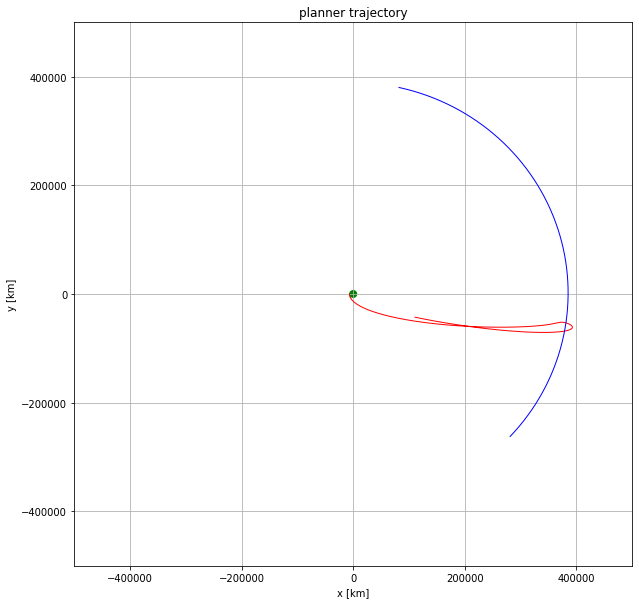

In [21]:
i_df=0
print('i_df= '+str(i_df))
print(df_parameter.index[5]+'='+str(df_parameter.iloc[5, i_df-1]))
print(df_parameter.index[7]+'='+str(df_parameter.iloc[7, i_df-1]))

fig.append(plt.figure(figsize=[10, 10]))
ax = plt.axes()

title="planner trajectory"

x1VarName="r3[1]"
y1VarName="r3[2]"
x2VarName="r2[1]"
y2VarName="r2[2]"

xlabel='x [km]'
ylabel='y [km]'

x1Var= df[i_df].loc[:, x1VarName]*1.0/1000.0
y1Var= df[i_df].loc[:, y1VarName]*1.0/1000.0
x2Var= df[i_df].loc[:, x2VarName]*1.0/1000.0
y2Var= df[i_df].loc[:, y2VarName]*1.0/1000.0

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.plot(x1Var, y1Var, color='red', linewidth=1.0)
plt.plot(x2Var, y2Var, color='blue', linewidth=1.0)
plt.grid()

# --- drow planet
planet = mpl.patches.Circle(xy=(0, 0), radius=6378.137, fc='green', ec='green')
ax.add_patch(planet)

plt.xlim(-500000, 500000) #plt.xticks(numpy.arange(-500000, 600000, 100000))
plt.ylim(-500000, 500000) #plt.yticks(numpy.arange(-500000, 600000, 100000))

print('------------------------------')

i_df= 0
v3_init[2]=-10740
phi_r2_deg_init=-70
------------------------------


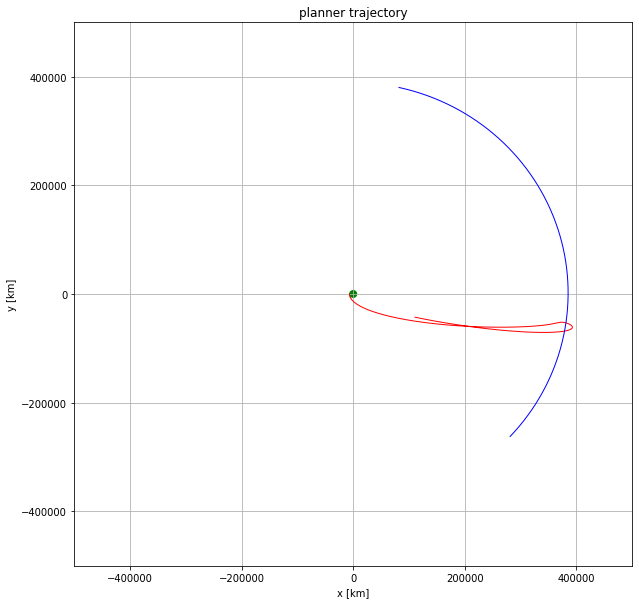

In [22]:
i_df=0
print('i_df= '+str(i_df))
print(df_parameter.index[5]+'='+str(df_parameter.iloc[5, i_df-1]))
print(df_parameter.index[7]+'='+str(df_parameter.iloc[7, i_df-1]))

fig.append(plt.figure(figsize=[10, 10]))
ax = plt.axes()

title="planner trajectory"

x1VarName="r3[1]"
y1VarName="r3[2]"
x2VarName="r2[1]"
y2VarName="r2[2]"

xlabel='x [km]'
ylabel='y [km]'

x1Var= df[i_df].loc[:, x1VarName]*1.0/1000.0
y1Var= df[i_df].loc[:, y1VarName]*1.0/1000.0
x2Var= df[i_df].loc[:, x2VarName]*1.0/1000.0
y2Var= df[i_df].loc[:, y2VarName]*1.0/1000.0

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.plot(x1Var, y1Var, color='red', linewidth=1.0)
plt.plot(x2Var, y2Var, color='blue', linewidth=1.0)
plt.grid()

# --- drow planet
planet = mpl.patches.Circle(xy=(0, 0), radius=6378.137, fc='green', ec='green')
ax.add_patch(planet)

plt.xlim(-500000, 500000) #plt.xticks(numpy.arange(-500000, 600000, 100000))
plt.ylim(-500000, 500000) #plt.yticks(numpy.arange(-500000, 600000, 100000))

print('------------------------------')

In [23]:
print(str(len(df)))


100004


<h1>===========================================================================</h1>

------------------------------

Dir to save figs is...
/home/ubuntu/OMPythonWork/AircraftDynamics.PtMassFDM.DoF3.Examples.ThreeBodyOrbital00/PtMassFDM.DoF3.Examples.ThreeBodyOrbital00_visualizeDat

colBegin=599
colEnd=709

i=599
i_df=3142
data read: /home/ubuntu/OMPythonWork/AircraftDynamics.PtMassFDM.DoF3.Examples.ThreeBodyOrbital00/ThreeBodyOrbital00_res_3142.csv
/home/ubuntu/OMPythonWork/AircraftDynamics.PtMassFDM.DoF3.Examples.ThreeBodyOrbital00/PtMassFDM.DoF3.Examples.ThreeBodyOrbital00_visualizeDat/case_3142_v3_init[2]=-10741_phi_r2_deg_init=-50.5_Trajectory-XY.jpg


FileNotFoundError: [Errno 2] No such file or directory: '/home/ubuntu/OMPythonWork/AircraftDynamics.PtMassFDM.DoF3.Examples.ThreeBodyOrbital00/PtMassFDM.DoF3.Examples.ThreeBodyOrbital00_visualizeDat/case_3142_v3_init[2]=-10741_phi_r2_deg_init=-50.5_Trajectory-XY.jpg'

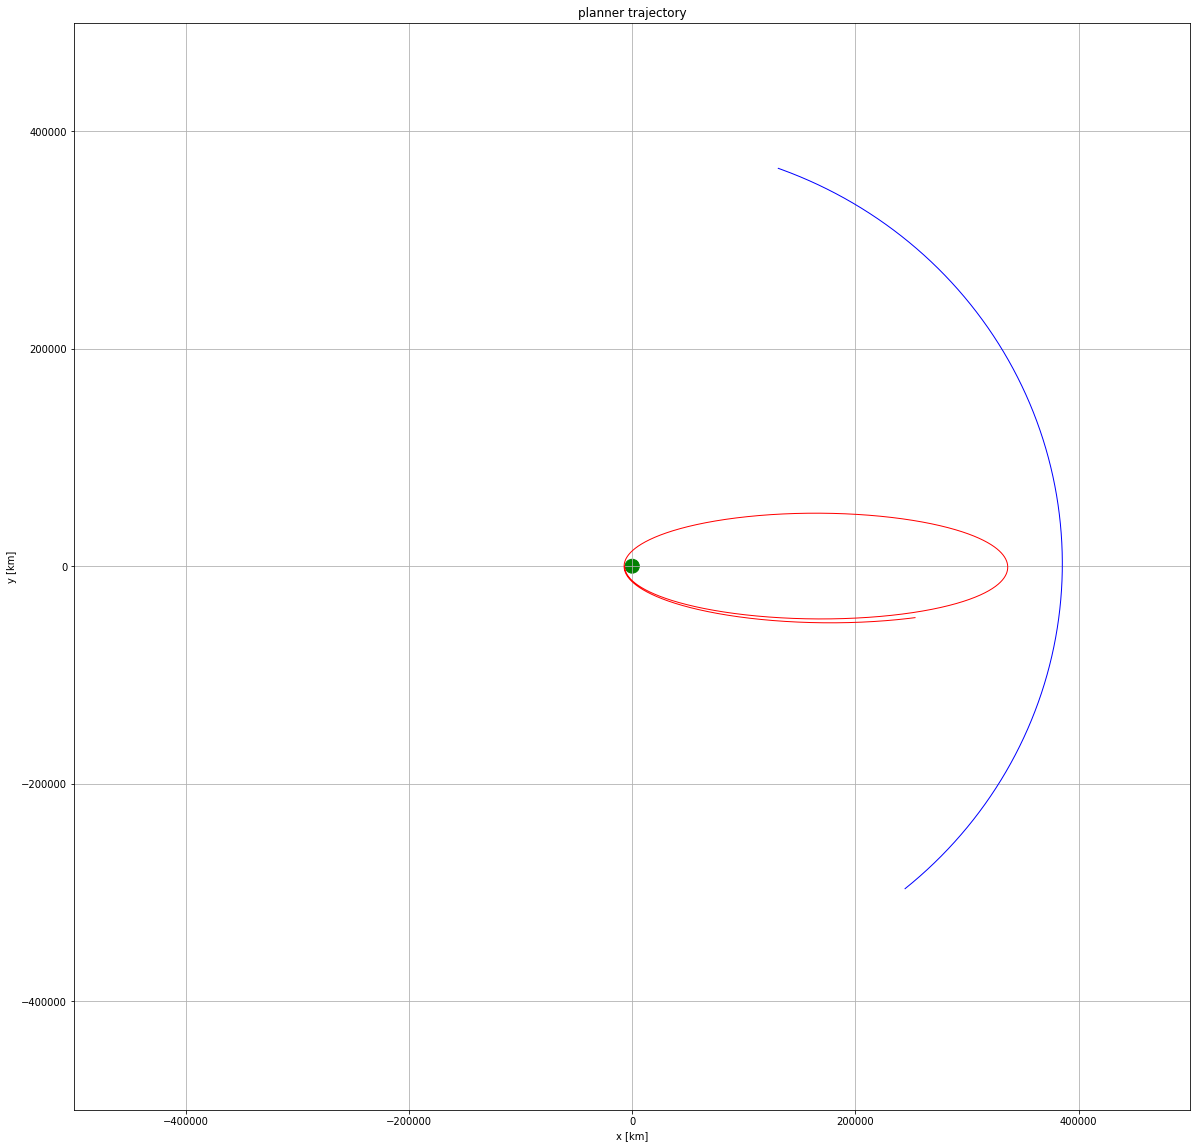

In [25]:
i_df_begin= 3142
i_df_end= 3252

subDir="PtMassFDM.DoF3.Examples.ThreeBodyOrbital00_visualizeDat"
swDir="ipynbs"
'''
'ipynbs': csv is in the save directory as this ipynbs
'workDir': csv is in the same directory as working dir
'''

#*** get directory of this notebook
sys.path.append('..')
pathNotebook=''
pathNotebook= os.getcwd()
pathNotebook= pathNotebook.replace(backslash, '/')
print('------------------------------'); print('')

#***
if(swDir=='workDir'):
    fullPathDir= dirWork+'/'+subDir
elif(swDir=='ipynbs'):
    fullPathDir= pathNotebook+'/'+subDir
#***** end if *****
print('Dir to save figs is...')
print(fullPathDir)
print('')

#************************************************************
#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()

print('colBegin='+str(df_parameter.columns.get_loc(str(i_df_begin))))
print('colEnd='+str(df_parameter.columns.get_loc(str(i_df_end))))
print('')

i_df=i_df_begin
for i in range(df_parameter.columns.get_loc(str(i_df_begin)), df_parameter.columns.get_loc(str(i_df_end))+1):
    print('i='+str(i))
    print('i_df='+str(i_df))
    
    nmcsv= nmModel + '_res_' + str(i_df) + '.csv'
    fullpathFile= os.getcwd()+"/"+nmcsv
    fullpathFile= fullpathFile.replace(backslash, "/")
    print("data read: "+ fullpathFile)
    df.insert(i_df, pd.read_csv(nmcsv))
    
    fullPathFigName= fullPathDir+'/'+'case_'+str(i_df)+'_'+df_parameter.index[5]+'='+str(df_parameter.loc['v3_init[2]', str(i_df)])+'_'+df_parameter.index[7]+'='+str(df_parameter.loc['phi_r2_deg_init', str(i_df)])+'_Trajectory-XY.jpg'
    print(fullPathFigName)
    
    fig.append(plt.figure(figsize=[20, 20]))
    ax = plt.axes()

    title="planner trajectory"

    x1VarName="r3[1]"
    y1VarName="r3[2]"
    x2VarName="r2[1]"
    y2VarName="r2[2]"

    xlabel='x [km]'
    ylabel='y [km]'

    x1Var= df[i_df].loc[:, x1VarName]*1.0/1000.0
    y1Var= df[i_df].loc[:, y1VarName]*1.0/1000.0
    x2Var= df[i_df].loc[:, x2VarName]*1.0/1000.0
    y2Var= df[i_df].loc[:, y2VarName]*1.0/1000.0

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.plot(x1Var, y1Var, color='red', linewidth=1.0)
    plt.plot(x2Var, y2Var, color='blue', linewidth=1.0)
    plt.grid()

    # --- drow planet
    planet = mpl.patches.Circle(xy=(0, 0), radius=6378.137, fc='green', ec='green')
    ax.add_patch(planet)

    plt.xlim(-500000, 500000) #plt.xticks(numpy.arange(-500000, 600000, 100000))
    plt.ylim(-500000, 500000) #plt.yticks(numpy.arange(-500000, 600000, 100000))
    
    plt.savefig(fullPathFigName)
    
    i_df=i_df+1
    print('')
#***** end for *****
print('------------------------------')


<h1>===========================================================================</h1>

In [ ]:
i_df=249
print('i_df= '+str(i_df))
print(df_parameter.index[5]+'='+str(df_parameter.iloc[5, i_df-1]))
print(df_parameter.index[7]+'='+str(df_parameter.iloc[7, i_df-1]))

fig.append(plt.figure(figsize=[10, 10]))
ax = plt.axes()

title="planner trajectory"

x1VarName="r3[1]"
y1VarName="r3[2]"
x2VarName="r2[1]"
y2VarName="r2[2]"

xlabel='x [km]'
ylabel='y [km]'

x1Var= df[i_df].loc[:, x1VarName]*1.0/1000.0
y1Var= df[i_df].loc[:, y1VarName]*1.0/1000.0
x2Var= df[i_df].loc[:, x2VarName]*1.0/1000.0
y2Var= df[i_df].loc[:, y2VarName]*1.0/1000.0

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.plot(x1Var, y1Var, color='red', linewidth=1.0)
plt.plot(x2Var, y2Var, color='blue', linewidth=1.0)
plt.grid()

# --- drow planet
planet = mpl.patches.Circle(xy=(0, 0), radius=6378.137, fc='green', ec='green')
ax.add_patch(planet)

plt.xlim(-500000, 500000) #plt.xticks(numpy.arange(-500000, 600000, 100000))
plt.ylim(-500000, 500000) #plt.yticks(numpy.arange(-500000, 600000, 100000))

print('------------------------------')

In [ ]:
i_df=i_df+1
print('i_df= '+str(i_df))
print(df_parameter.index[5]+'='+str(df_parameter.iloc[5, i_df-1]))
print(df_parameter.index[7]+'='+str(df_parameter.iloc[7, i_df-1]))

fig.append(plt.figure(figsize=[10, 10]))
ax = plt.axes()

title="planner trajectory"

x1VarName="r3[1]"
y1VarName="r3[2]"
x2VarName="r2[1]"
y2VarName="r2[2]"

xlabel='x [km]'
ylabel='y [km]'

x1Var= df[i_df].loc[:, x1VarName]*1.0/1000.0
y1Var= df[i_df].loc[:, y1VarName]*1.0/1000.0
x2Var= df[i_df].loc[:, x2VarName]*1.0/1000.0
y2Var= df[i_df].loc[:, y2VarName]*1.0/1000.0

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.plot(x1Var, y1Var, color='red', linewidth=1.0)
plt.plot(x2Var, y2Var, color='blue', linewidth=1.0)
plt.grid()

# --- drow planet
planet = mpl.patches.Circle(xy=(0, 0), radius=6378.137, fc='green', ec='green')
ax.add_patch(planet)

plt.xlim(-500000, 500000) #plt.xticks(numpy.arange(-500000, 600000, 100000))
plt.ylim(-500000, 500000) #plt.yticks(numpy.arange(-500000, 600000, 100000))

print('------------------------------')

In [ ]:
i_df=i_df+1
print('i_df= '+str(i_df))
print(df_parameter.index[5]+'='+str(df_parameter.iloc[5, i_df-1]))
print(df_parameter.index[7]+'='+str(df_parameter.iloc[7, i_df-1]))

fig.append(plt.figure(figsize=[10, 10]))
ax = plt.axes()

title="planner trajectory"

x1VarName="r3[1]"
y1VarName="r3[2]"
x2VarName="r2[1]"
y2VarName="r2[2]"

xlabel='x [km]'
ylabel='y [km]'

x1Var= df[i_df].loc[:, x1VarName]*1.0/1000.0
y1Var= df[i_df].loc[:, y1VarName]*1.0/1000.0
x2Var= df[i_df].loc[:, x2VarName]*1.0/1000.0
y2Var= df[i_df].loc[:, y2VarName]*1.0/1000.0

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.plot(x1Var, y1Var, color='red', linewidth=1.0)
plt.plot(x2Var, y2Var, color='blue', linewidth=1.0)
plt.grid()

# --- drow planet
planet = mpl.patches.Circle(xy=(0, 0), radius=6378.137, fc='green', ec='green')
ax.add_patch(planet)

plt.xlim(-500000, 500000) #plt.xticks(numpy.arange(-500000, 600000, 100000))
plt.ylim(-500000, 500000) #plt.yticks(numpy.arange(-500000, 600000, 100000))

print('------------------------------')

In [ ]:
i_df=i_df+1
print('i_df= '+str(i_df))
print(df_parameter.index[5]+'='+str(df_parameter.iloc[5, i_df-1]))
print(df_parameter.index[7]+'='+str(df_parameter.iloc[7, i_df-1]))

fig.append(plt.figure(figsize=[10, 10]))
ax = plt.axes()

title="planner trajectory"

x1VarName="r3[1]"
y1VarName="r3[2]"
x2VarName="r2[1]"
y2VarName="r2[2]"

xlabel='x [km]'
ylabel='y [km]'

x1Var= df[i_df].loc[:, x1VarName]*1.0/1000.0
y1Var= df[i_df].loc[:, y1VarName]*1.0/1000.0
x2Var= df[i_df].loc[:, x2VarName]*1.0/1000.0
y2Var= df[i_df].loc[:, y2VarName]*1.0/1000.0

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.plot(x1Var, y1Var, color='red', linewidth=1.0)
plt.plot(x2Var, y2Var, color='blue', linewidth=1.0)
plt.grid()

# --- drow planet
planet = mpl.patches.Circle(xy=(0, 0), radius=6378.137, fc='green', ec='green')
ax.add_patch(planet)

plt.xlim(-500000, 500000) #plt.xticks(numpy.arange(-500000, 600000, 100000))
plt.ylim(-500000, 500000) #plt.yticks(numpy.arange(-500000, 600000, 100000))

print('------------------------------')

In [ ]:
i_df=i_df+1
print('i_df= '+str(i_df))
print(df_parameter.index[5]+'='+str(df_parameter.iloc[5, i_df-1]))
print(df_parameter.index[7]+'='+str(df_parameter.iloc[7, i_df-1]))

fig.append(plt.figure(figsize=[10, 10]))
ax = plt.axes()

title="planner trajectory"

x1VarName="r3[1]"
y1VarName="r3[2]"
x2VarName="r2[1]"
y2VarName="r2[2]"

xlabel='x [km]'
ylabel='y [km]'

x1Var= df[i_df].loc[:, x1VarName]*1.0/1000.0
y1Var= df[i_df].loc[:, y1VarName]*1.0/1000.0
x2Var= df[i_df].loc[:, x2VarName]*1.0/1000.0
y2Var= df[i_df].loc[:, y2VarName]*1.0/1000.0

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.plot(x1Var, y1Var, color='red', linewidth=1.0)
plt.plot(x2Var, y2Var, color='blue', linewidth=1.0)
plt.grid()

# --- drow planet
planet = mpl.patches.Circle(xy=(0, 0), radius=6378.137, fc='green', ec='green')
ax.add_patch(planet)

plt.xlim(-500000, 500000) #plt.xticks(numpy.arange(-500000, 600000, 100000))
plt.ylim(-500000, 500000) #plt.yticks(numpy.arange(-500000, 600000, 100000))

print('------------------------------')

In [ ]:
i_df=i_df+1
print('i_df= '+str(i_df))
print(df_parameter.index[5]+'='+str(df_parameter.iloc[5, i_df-1]))
print(df_parameter.index[7]+'='+str(df_parameter.iloc[7, i_df-1]))

fig.append(plt.figure(figsize=[10, 10]))
ax = plt.axes()

title="planner trajectory"

x1VarName="r3[1]"
y1VarName="r3[2]"
x2VarName="r2[1]"
y2VarName="r2[2]"

xlabel='x [km]'
ylabel='y [km]'

x1Var= df[i_df].loc[:, x1VarName]*1.0/1000.0
y1Var= df[i_df].loc[:, y1VarName]*1.0/1000.0
x2Var= df[i_df].loc[:, x2VarName]*1.0/1000.0
y2Var= df[i_df].loc[:, y2VarName]*1.0/1000.0

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.plot(x1Var, y1Var, color='red', linewidth=1.0)
plt.plot(x2Var, y2Var, color='blue', linewidth=1.0)
plt.grid()

# --- drow planet
planet = mpl.patches.Circle(xy=(0, 0), radius=6378.137, fc='green', ec='green')
ax.add_patch(planet)

plt.xlim(-500000, 500000) #plt.xticks(numpy.arange(-500000, 600000, 100000))
plt.ylim(-500000, 500000) #plt.yticks(numpy.arange(-500000, 600000, 100000))

print('------------------------------')

In [ ]:
i_df=i_df+1
print('i_df= '+str(i_df))
print(df_parameter.index[5]+'='+str(df_parameter.iloc[5, i_df-1]))
print(df_parameter.index[7]+'='+str(df_parameter.iloc[7, i_df-1]))

fig.append(plt.figure(figsize=[10, 10]))
ax = plt.axes()

title="planner trajectory"

x1VarName="r3[1]"
y1VarName="r3[2]"
x2VarName="r2[1]"
y2VarName="r2[2]"

xlabel='x [km]'
ylabel='y [km]'

x1Var= df[i_df].loc[:, x1VarName]*1.0/1000.0
y1Var= df[i_df].loc[:, y1VarName]*1.0/1000.0
x2Var= df[i_df].loc[:, x2VarName]*1.0/1000.0
y2Var= df[i_df].loc[:, y2VarName]*1.0/1000.0

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.plot(x1Var, y1Var, color='red', linewidth=1.0)
plt.plot(x2Var, y2Var, color='blue', linewidth=1.0)
plt.grid()

# --- drow planet
planet = mpl.patches.Circle(xy=(0, 0), radius=6378.137, fc='green', ec='green')
ax.add_patch(planet)

plt.xlim(-500000, 500000) #plt.xticks(numpy.arange(-500000, 600000, 100000))
plt.ylim(-500000, 500000) #plt.yticks(numpy.arange(-500000, 600000, 100000))

print('------------------------------')

In [ ]:
i_df=i_df+1
print('i_df= '+str(i_df))
print(df_parameter.index[5]+'='+str(df_parameter.iloc[5, i_df-1]))
print(df_parameter.index[7]+'='+str(df_parameter.iloc[7, i_df-1]))

fig.append(plt.figure(figsize=[10, 10]))
ax = plt.axes()

title="planner trajectory"

x1VarName="r3[1]"
y1VarName="r3[2]"
x2VarName="r2[1]"
y2VarName="r2[2]"

xlabel='x [km]'
ylabel='y [km]'

x1Var= df[i_df].loc[:, x1VarName]*1.0/1000.0
y1Var= df[i_df].loc[:, y1VarName]*1.0/1000.0
x2Var= df[i_df].loc[:, x2VarName]*1.0/1000.0
y2Var= df[i_df].loc[:, y2VarName]*1.0/1000.0

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.plot(x1Var, y1Var, color='red', linewidth=1.0)
plt.plot(x2Var, y2Var, color='blue', linewidth=1.0)
plt.grid()

# --- drow planet
planet = mpl.patches.Circle(xy=(0, 0), radius=6378.137, fc='green', ec='green')
ax.add_patch(planet)

plt.xlim(-500000, 500000) #plt.xticks(numpy.arange(-500000, 600000, 100000))
plt.ylim(-500000, 500000) #plt.yticks(numpy.arange(-500000, 600000, 100000))

print('------------------------------')

In [ ]:
i_df=i_df+1
print('i_df= '+str(i_df))
print(df_parameter.index[5]+'='+str(df_parameter.iloc[5, i_df-1]))
print(df_parameter.index[7]+'='+str(df_parameter.iloc[7, i_df-1]))

fig.append(plt.figure(figsize=[10, 10]))
ax = plt.axes()

title="planner trajectory"

x1VarName="r3[1]"
y1VarName="r3[2]"
x2VarName="r2[1]"
y2VarName="r2[2]"

xlabel='x [km]'
ylabel='y [km]'

x1Var= df[i_df].loc[:, x1VarName]*1.0/1000.0
y1Var= df[i_df].loc[:, y1VarName]*1.0/1000.0
x2Var= df[i_df].loc[:, x2VarName]*1.0/1000.0
y2Var= df[i_df].loc[:, y2VarName]*1.0/1000.0

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.plot(x1Var, y1Var, color='red', linewidth=1.0)
plt.plot(x2Var, y2Var, color='blue', linewidth=1.0)
plt.grid()

# --- drow planet
planet = mpl.patches.Circle(xy=(0, 0), radius=6378.137, fc='green', ec='green')
ax.add_patch(planet)

plt.xlim(-500000, 500000) #plt.xticks(numpy.arange(-500000, 600000, 100000))
plt.ylim(-500000, 500000) #plt.yticks(numpy.arange(-500000, 600000, 100000))

print('------------------------------')

In [ ]:
i_df=i_df+1
print('i_df= '+str(i_df))
print(df_parameter.index[5]+'='+str(df_parameter.iloc[5, i_df-1]))
print(df_parameter.index[7]+'='+str(df_parameter.iloc[7, i_df-1]))

fig.append(plt.figure(figsize=[10, 10]))
ax = plt.axes()

title="planner trajectory"

x1VarName="r3[1]"
y1VarName="r3[2]"
x2VarName="r2[1]"
y2VarName="r2[2]"

xlabel='x [km]'
ylabel='y [km]'

x1Var= df[i_df].loc[:, x1VarName]*1.0/1000.0
y1Var= df[i_df].loc[:, y1VarName]*1.0/1000.0
x2Var= df[i_df].loc[:, x2VarName]*1.0/1000.0
y2Var= df[i_df].loc[:, y2VarName]*1.0/1000.0

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.plot(x1Var, y1Var, color='red', linewidth=1.0)
plt.plot(x2Var, y2Var, color='blue', linewidth=1.0)
plt.grid()

# --- drow planet
planet = mpl.patches.Circle(xy=(0, 0), radius=6378.137, fc='green', ec='green')
ax.add_patch(planet)

plt.xlim(-500000, 500000) #plt.xticks(numpy.arange(-500000, 600000, 100000))
plt.ylim(-500000, 500000) #plt.yticks(numpy.arange(-500000, 600000, 100000))

print('------------------------------')

In [ ]:
i_df=i_df+1
print('i_df= '+str(i_df))
print(df_parameter.index[5]+'='+str(df_parameter.iloc[5, i_df-1]))
print(df_parameter.index[7]+'='+str(df_parameter.iloc[7, i_df-1]))

fig.append(plt.figure(figsize=[10, 10]))
ax = plt.axes()

title="planner trajectory"

x1VarName="r3[1]"
y1VarName="r3[2]"
x2VarName="r2[1]"
y2VarName="r2[2]"

xlabel='x [km]'
ylabel='y [km]'

x1Var= df[i_df].loc[:, x1VarName]*1.0/1000.0
y1Var= df[i_df].loc[:, y1VarName]*1.0/1000.0
x2Var= df[i_df].loc[:, x2VarName]*1.0/1000.0
y2Var= df[i_df].loc[:, y2VarName]*1.0/1000.0

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.plot(x1Var, y1Var, color='red', linewidth=1.0)
plt.plot(x2Var, y2Var, color='blue', linewidth=1.0)
plt.grid()

# --- drow planet
planet = mpl.patches.Circle(xy=(0, 0), radius=6378.137, fc='green', ec='green')
ax.add_patch(planet)

plt.xlim(-500000, 500000) #plt.xticks(numpy.arange(-500000, 600000, 100000))
plt.ylim(-500000, 500000) #plt.yticks(numpy.arange(-500000, 600000, 100000))

print('------------------------------')

In [ ]:
i_df=i_df+1
print('i_df= '+str(i_df))
print(df_parameter.index[5]+'='+str(df_parameter.iloc[5, i_df-1]))
print(df_parameter.index[7]+'='+str(df_parameter.iloc[7, i_df-1]))

fig.append(plt.figure(figsize=[10, 10]))
ax = plt.axes()

title="planner trajectory"

x1VarName="r3[1]"
y1VarName="r3[2]"
x2VarName="r2[1]"
y2VarName="r2[2]"

xlabel='x [km]'
ylabel='y [km]'

x1Var= df[i_df].loc[:, x1VarName]*1.0/1000.0
y1Var= df[i_df].loc[:, y1VarName]*1.0/1000.0
x2Var= df[i_df].loc[:, x2VarName]*1.0/1000.0
y2Var= df[i_df].loc[:, y2VarName]*1.0/1000.0

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.plot(x1Var, y1Var, color='red', linewidth=1.0)
plt.plot(x2Var, y2Var, color='blue', linewidth=1.0)
plt.grid()

# --- drow planet
planet = mpl.patches.Circle(xy=(0, 0), radius=6378.137, fc='green', ec='green')
ax.add_patch(planet)

plt.xlim(-500000, 500000) #plt.xticks(numpy.arange(-500000, 600000, 100000))
plt.ylim(-500000, 500000) #plt.yticks(numpy.arange(-500000, 600000, 100000))

print('------------------------------')

In [ ]:
'''
i_df=1
fig.append(plt.figure(figsize = (18, 18)))
ax = fig[-1].add_subplot(111, projection="3d")

# ***** Make data for sphere *****
u = numpy.linspace(0, 2 * numpy.pi, 50)
v = numpy.linspace(0, numpy.pi, 50)
radius= 6378.137
xShpere = radius * numpy.outer(numpy.cos(u), numpy.sin(v))
yShpere = radius * numpy.outer(numpy.sin(u), numpy.sin(v))
zShpere = radius * numpy.outer(numpy.ones(numpy.size(u)), numpy.cos(v))

ax.plot_surface(xShpere, yShpere, zShpere, zorder=-1, color='green')

# ***** plot trajectry *****
title="flight trajectory"
xVarName="r2[1]"
yVarName="r2[2]"
zVarName="r2[3]"
xlabel='x [km]'
ylabel='y [km]'
zlabel="z [km]"

xVar= df[i_df].loc[:, xVarName]*1.0/1000.0
yVar= df[i_df].loc[:, yVarName]*1.0/1000.0
zVar= df[i_df].loc[:, zVarName]*1.0/1000.0

ax.set_title(title, size=20)
ax.set_xlabel(xlabel, size=12)
ax.set_ylabel(ylabel, size=12)
ax.set_zlabel(zlabel, size=12)

ax.plot(xVar, yVar, zVar, zorder=2, color='red', linewidth=1.0)

plt.grid()
ax.set_xlim(0, 240)
ax.set_ylim(0, 240)
ax.set_zlim(0, 100+10)
ax.set_xticks( numpy.arange(-10000, 12000, 2000) )
ax.set_yticks( numpy.arange(-10000, 12000, 2000) )
ax.set_zticks( numpy.arange(-10000, 12000, 2000) )

ax.view_init( elev=70, azim=-60 )

print('------------------------------')
'''

<h1>Extract variables at specified time</h1>

<p>----------------------------------------------------------------------</p>

<h1>Process at the end of note</h1>

In [ ]:
print(""); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')